In [1]:
import warnings

import moscot as mt
from moscot import datasets
from moscot.problems.space import AlignmentProblem

import scanpy as sc
import squidpy as sq

warnings.simplefilter("ignore", UserWarning)

import pandas as pd

In [2]:
datasets = ["BZ5","BZ9","BZ14"]
input_dir = 'G:/dataset/STARmap/input/'
output_dir = 'G:/dataset/STARmap/output/moscot/'
experiment_name = 'STARmap'

In [3]:
import anndata as ad
adata_list = []

for dataset in datasets:
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()

    adata = sc.read_h5ad(input_dir+dataset+'/'+dataset+'.h5ad')
    df = adata.obs[['x','y']]
    adata.obsm['spatial'] = df.values
    
    adata.obs['ground.truth'] = adata.obs.loc[adata.obs_names, 'ClusterName'].astype('category')
    adata = adata[~pd.isna(adata.obs['x'])]
    
    # make spot name unique
    adata.obs_names = [x + '_' + dataset for x in adata.obs_names]

    adata_list.append(adata)

print(adata_list)
adata = ad.concat(adata_list, label="slice_name", keys=datasets)
# adata =sc.AnnData.concatenate(adata_list[0],adata_list[1],adata_list[2],adata_list[3])
print(adata)
del adata_list

[AnnData object with n_obs × n_vars = 1049 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'ground.truth'
    var: 'features'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 1053 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'ground.truth'
    var: 'features'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 1088 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'ground.truth'
    var: 'features'
    obsm: 'spatial']
AnnData object with n_obs × n_vars = 3190 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'ground.truth', 'slice_name'
    obsm: 'spatial'


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

In [4]:
# adata = datasets.sim_align()
adata.obs['slice_name']

1_BZ5         BZ5
3_BZ5         BZ5
5_BZ5         BZ5
6_BZ5         BZ5
7_BZ5         BZ5
             ... 
1204_BZ14    BZ14
1206_BZ14    BZ14
1211_BZ14    BZ14
1212_BZ14    BZ14
1213_BZ14    BZ14
Name: slice_name, Length: 3190, dtype: category
Categories (3, object): ['BZ5', 'BZ9', 'BZ14']

D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

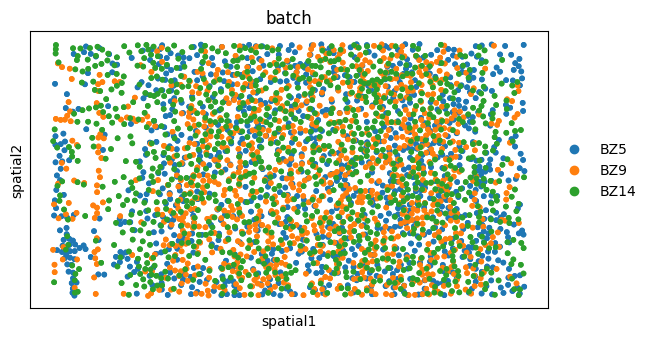

In [5]:
sq.pl.spatial_scatter(adata, shape=None, library_id="batch", color="batch")

In [6]:
%%time

ap = AlignmentProblem(adata=adata)
ap = ap.prepare(batch_key="batch", policy="sequential")

ap = ap.solve()

INFO     Ordering Index(['1_BZ5', '3_BZ5', '5_BZ5', '6_BZ5', '7_BZ5', '9_BZ5', '10_BZ5',                           
                '11_BZ5', '12_BZ5', '13_BZ5',                                                                      
                ...                                                                                                
                '1198_BZ14', '1199_BZ14', '1200_BZ14', '1201_BZ14', '1203_BZ14',                                   
                '1204_BZ14', '1206_BZ14', '1211_BZ14', '1212_BZ14', '1213_BZ14'],                                  
               dtype='object', length=3190) in ascending order.                                                    
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                        

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical

INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Solving `2` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(1049, 1053)].                                          


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical

WARNING  Solver did not converge                                                                                   
INFO     Solving problem OTProblem[stage='prepared', shape=(1053, 1088)].                                          


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


WARNING  Solver did not converge                                                                                   
CPU times: total: 3min 58s
Wall time: 3min 4s


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None a

AnnData object with n_obs × n_vars = 3190 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'ground.truth', 'slice_name'
    uns: 'batch_colors'
    obsm: 'spatial', 'spatial_warp_sequential'


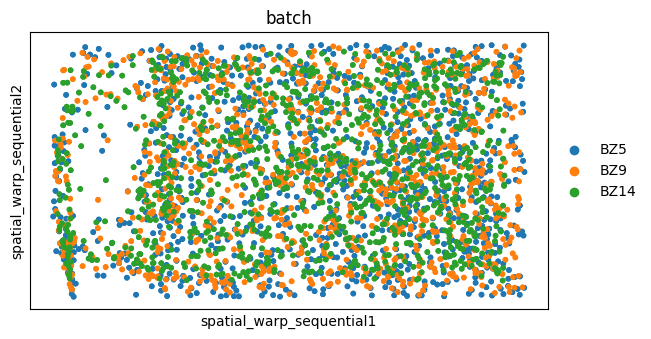

In [7]:
ap.align(reference="BZ5", mode="warp", spatial_key="spatial", key_added="spatial_warp_sequential")
print(adata)

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_warp_sequential", library_id="batch", color="batch"
)

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None a

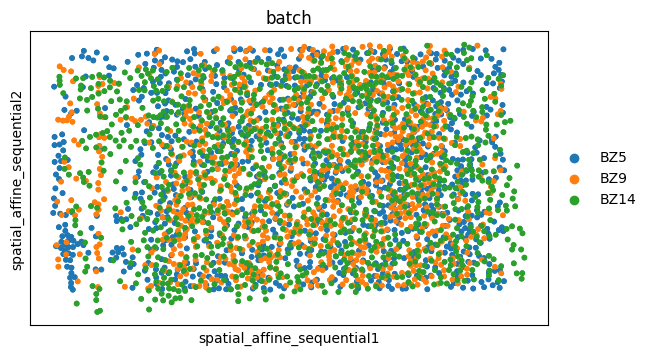

In [8]:
ap.align(reference="BZ5", mode="affine", spatial_key="spatial", key_added="spatial_affine_sequential")

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_affine_sequential", library_id="batch", color="batch"
)

In [ ]:
# %%time

# ap_star = AlignmentProblem(adata=adata)
# ap_star = ap_star.prepare(batch_key="batch", policy="star", reference="0")

# ap_star = ap_star.solve()

In [ ]:
# ap_star.align(reference="0", mode="warp", spatial_key="spatial", key_added="spatial_warp_star")
# print(adata)

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_warp_star", library_id="batch", color="batch"
# )

In [ ]:
# ap_star.align(reference="0", mode="affine", spatial_key="spatial", key_added="spatial_affine_star")

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_affine_star", library_id="batch", color="batch"
# )

In [9]:
adata

AnnData object with n_obs × n_vars = 3190 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'ground.truth', 'slice_name'
    uns: 'batch_colors', 'spatial_affine_sequential'
    obsm: 'spatial', 'spatial_warp_sequential', 'spatial_affine_sequential'

In [ ]:
adata

In [13]:
print(adata.isbacked)
adata.obs = adata.obs.astype('str')
adata.filename = output_dir + 'moscot_' + experiment_name + '.h5ad'
print(adata.isbacked)

False
True
